In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [2]:
Diamonds = pd.read_csv(r"D:/saikrishna data science/MACHINE PROJECTS/KNN DIAMOND PROJECT/diamonds.csv")

In [3]:
Diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
Diamond = Diamonds[['carat','cut','color','clarity','depth','table','x','y','z','price']]
Diamond

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [5]:
Diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
Diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
Diamond.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [8]:
Diamond = Diamond.drop(Diamond[Diamond['x']==0].index)
Diamond = Diamond.drop(Diamond[Diamond['y']==0].index)
Diamond = Diamond.drop(Diamond[Diamond['z']==0].index)

In [9]:
Diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   x        53920 non-null  float64
 7   y        53920 non-null  float64
 8   z        53920 non-null  float64
 9   price    53920 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [10]:
Diamond.describe()

,carat,depth,table,x,y,z,price
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,5.731627,5.734887,3.540046,3930.993231
std,0.473795,1.432331,2.234064,1.119423,1.140126,0.702530,3987.280446
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5323.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


 ### Univariate Analysis

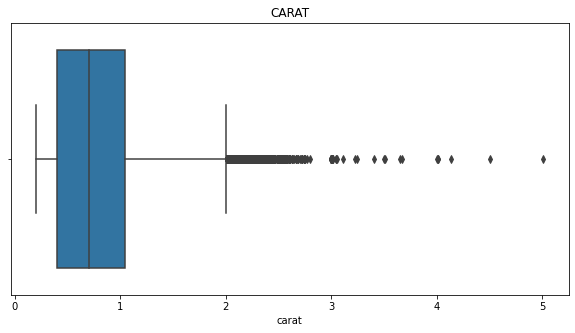

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(Diamond['carat'])
plt.title('CARAT')
plt.show()

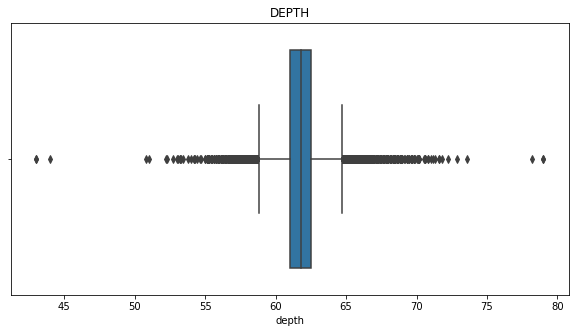

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(Diamond['depth'])
plt.title('DEPTH')
plt.show()

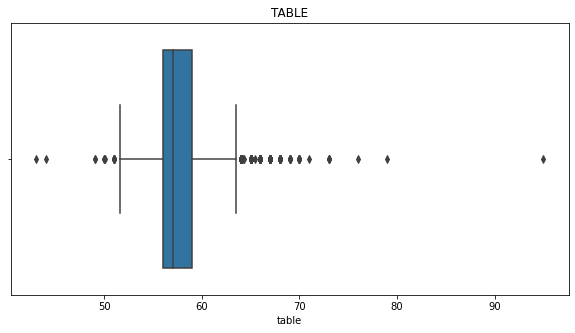

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(Diamond['table'])
plt.title('TABLE')
plt.show()

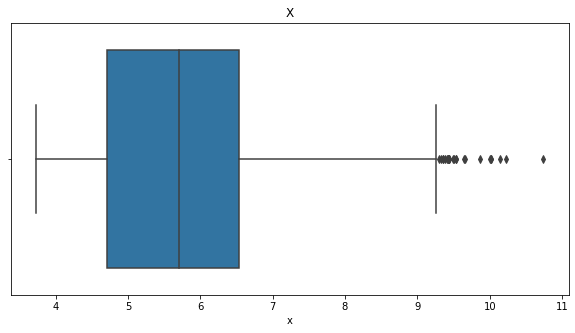

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(Diamond['x'])
plt.title('X')
plt.show()

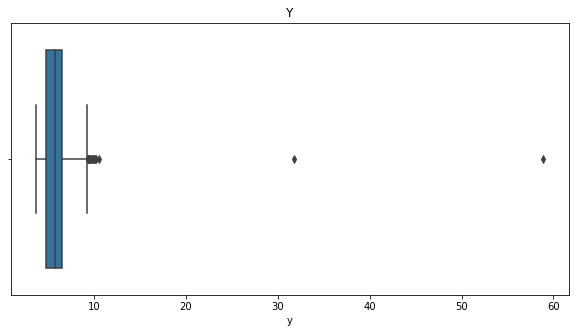

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(Diamond['y'])
plt.title('Y')
plt.show()

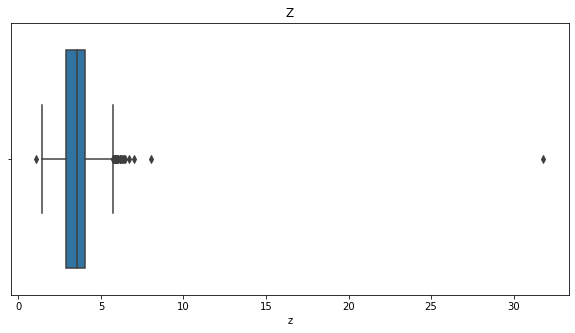

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(Diamond['z'])
plt.title('Z')
plt.show()

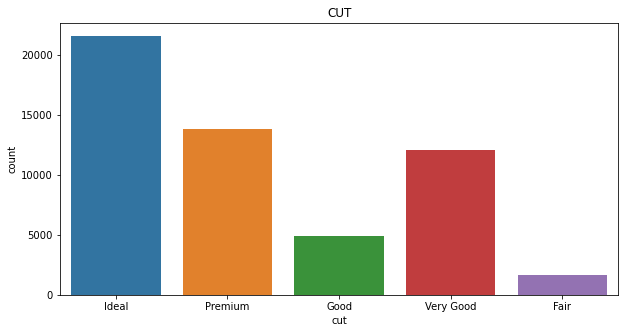

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'cut',data = Diamond)
plt.title('CUT')
plt.show()

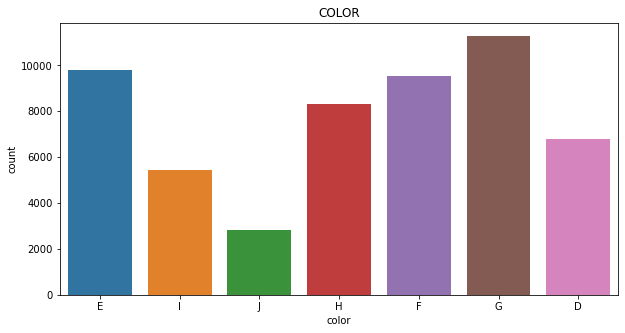

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'color',data = Diamond)
plt.title('COLOR')
plt.show()

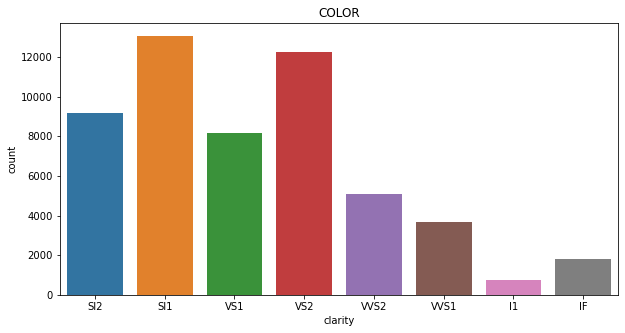

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'clarity',data = Diamond)
plt.title('COLOR')
plt.show()

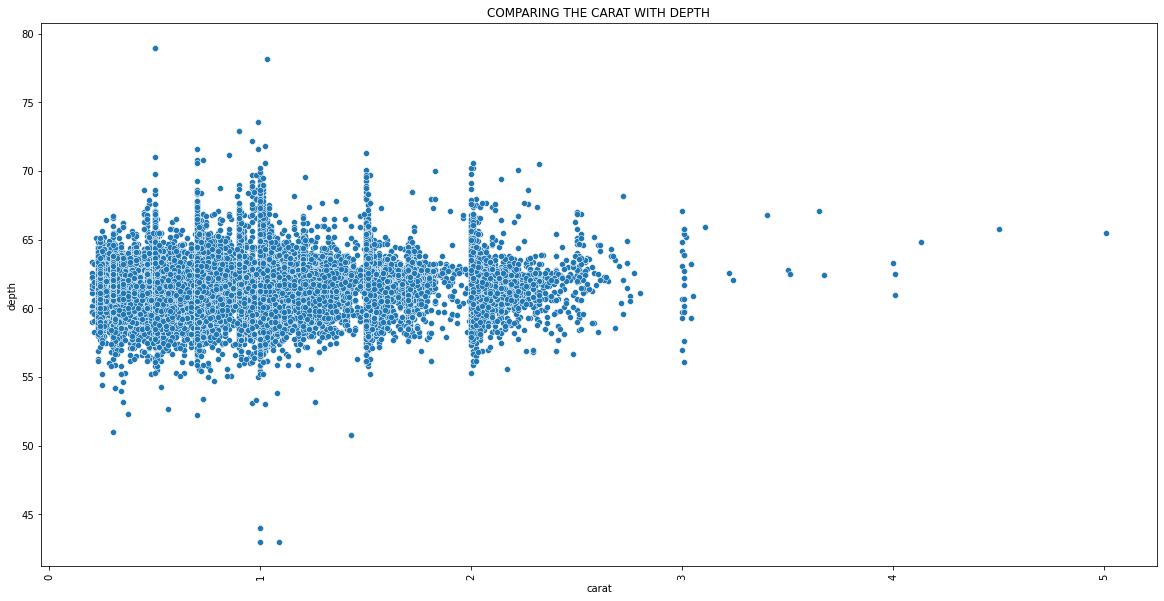

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='carat',y='depth',data=Diamond)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE CARAT WITH DEPTH')
plt.show()

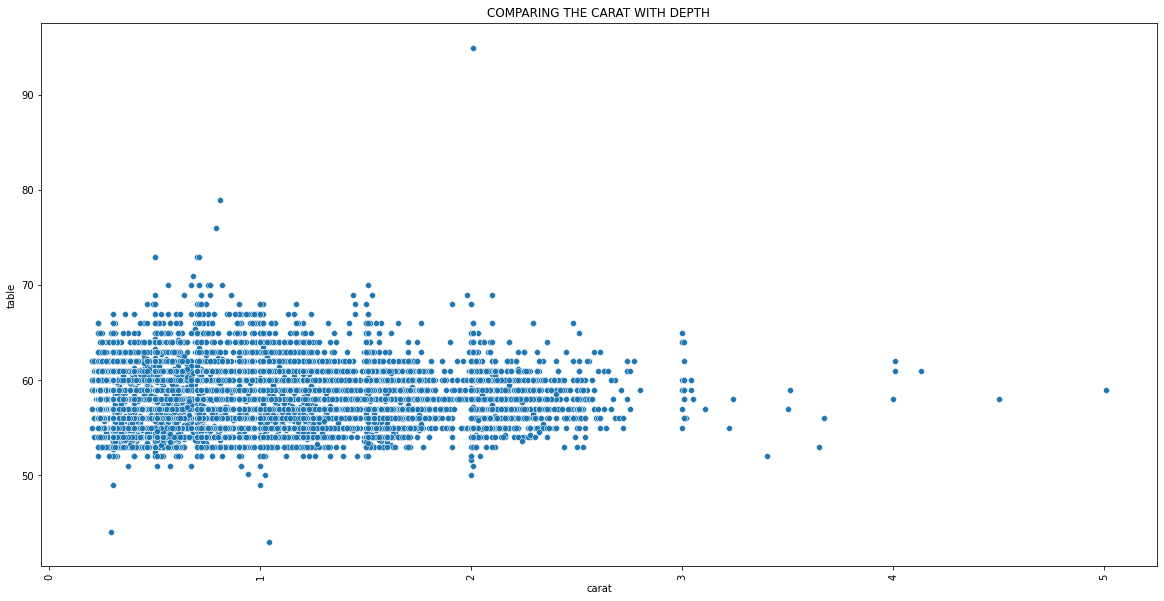

In [21]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='carat',y='table',data=Diamond)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE CARAT WITH DEPTH')
plt.show()

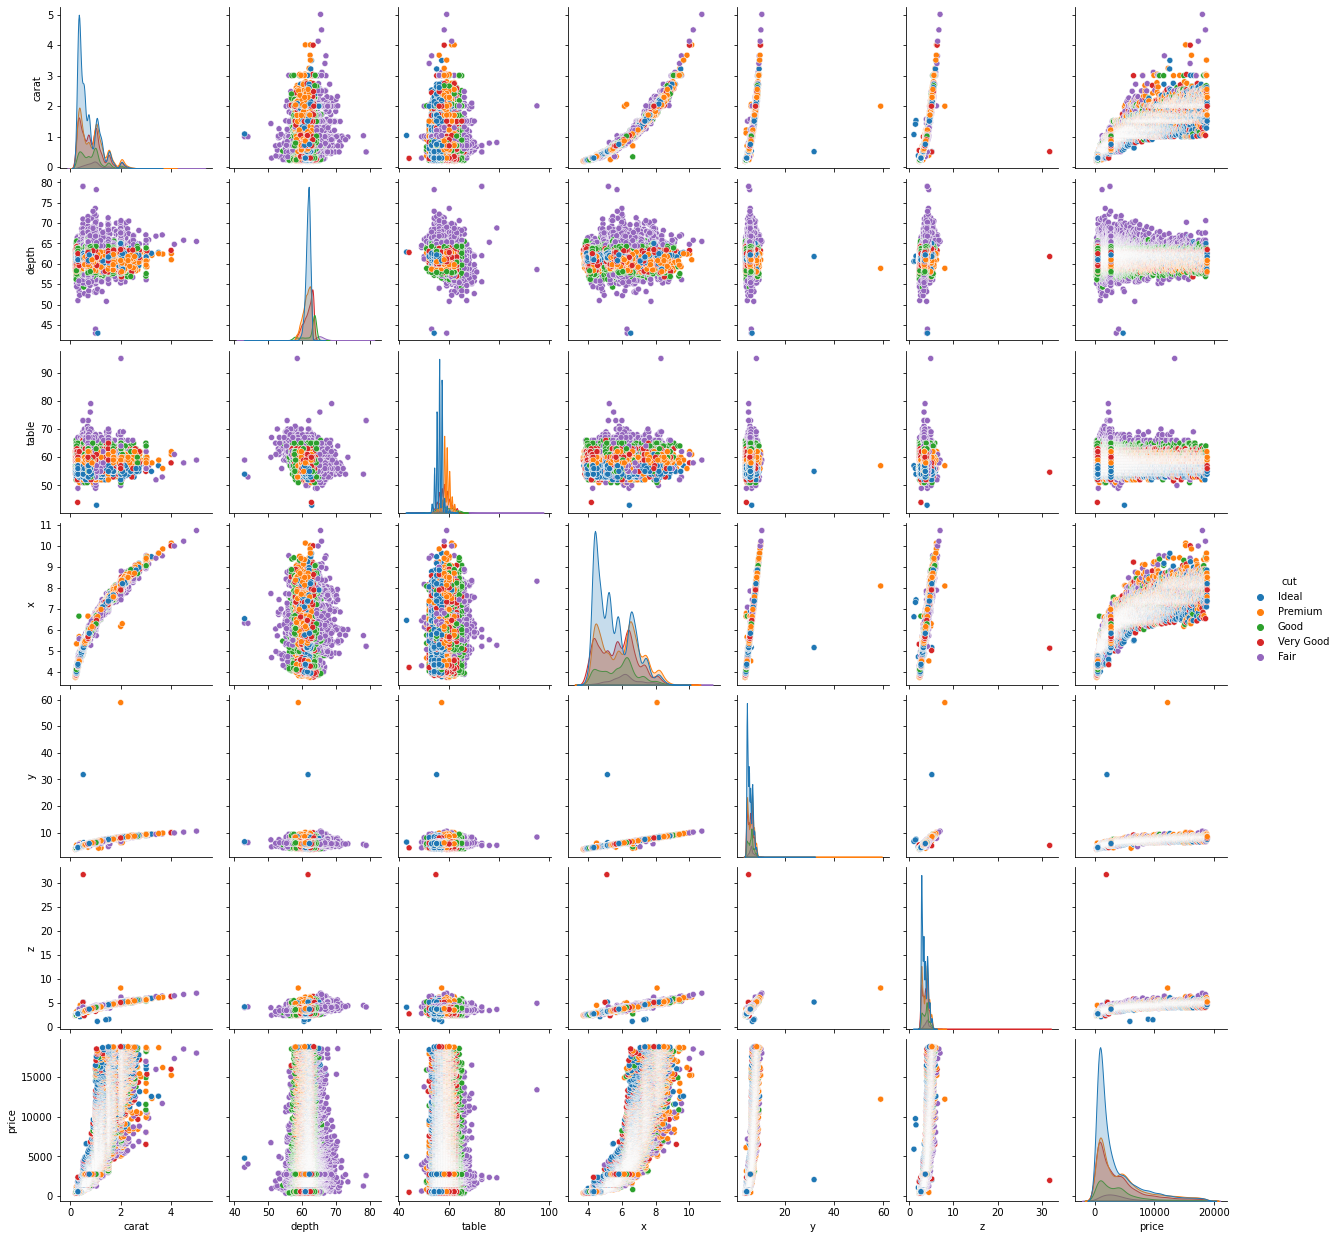

In [22]:
sns.pairplot(Diamond,hue='cut')
plt.show()

### STEP 1 : Identify the Target Variable and Splitting the Data into Train and Test

In [23]:
# Identifying the inputs (X) and output (y)

y = Diamond['price']
X = Diamond[['carat','cut','color','clarity','depth','table','x','y','z']]

In [24]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [25]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape) 

(40440, 9) (40440,)
(13480, 9) (13480,)


### STEP 2: Separating Categorical and Numerical Columns

In [26]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
19321,1.20,Good,G,VS2,57.8,59.0,7.06,7.00,4.06
9132,1.08,Ideal,H,SI2,60.4,57.0,6.68,6.63,4.02
38015,0.39,Premium,I,VVS2,63.0,56.0,4.68,4.62,2.93
35917,0.43,Premium,H,SI1,60.2,57.0,4.93,4.91,2.96
50428,0.73,Ideal,H,SI2,61.6,57.0,5.79,5.81,3.57


In [27]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [28]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
19321,Good,G,VS2
9132,Ideal,H,SI2
38015,Premium,I,VVS2
35917,Premium,H,SI1
50428,Ideal,H,SI2


In [29]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
19321,1.20,57.8,59.0,7.06,7.00,4.06
9132,1.08,60.4,57.0,6.68,6.63,4.02
38015,0.39,63.0,56.0,4.68,4.62,2.93
35917,0.43,60.2,57.0,4.93,4.91,2.96
50428,0.73,61.6,57.0,5.79,5.81,3.57


### Scaling the Numerical Features

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
19321,0.845610,-2.749623,0.689470,1.183523,1.097416,0.749997
9132,0.592901,-0.939977,-0.205331,0.844689,0.776067,0.692282
38015,-0.860177,0.869669,-0.652731,-0.938646,-0.969639,-0.880470
35917,-0.775940,-1.079180,-0.205331,-0.715729,-0.717771,-0.837183
50428,-0.144167,-0.104756,-0.205331,0.051105,0.063889,0.042981


### Encoding Ordinal Columns:

In [31]:
X_train_cat.head()

,cut,color,clarity
19321,Good,G,VS2
9132,Ideal,H,SI2
38015,Premium,I,VVS2
35917,Premium,H,SI1
50428,Ideal,H,SI2


In [32]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
19321
9132
38015
35917
50428


In [33]:
X_train_cat['cut'].unique()

array(['Good', 'Ideal', 'Premium', 'Very Good', 'Fair'], dtype=object)

In [34]:
cut_encoder = {'Fair':1,'Good':2,'Very Good':3,'Ideal':4,'Premium':5}
X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])
X_train_cat_le.head()

,cut
19321,2
9132,4
38015,5
35917,5
50428,4


In [35]:
X_train_cat['color'].unique()

array(['G', 'H', 'I', 'J', 'E', 'D', 'F'], dtype=object)

In [36]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])
X_train_cat_le.head()

,cut,color
19321,2,4
9132,4,3
38015,5,2
35917,5,3
50428,4,3


In [37]:
X_train_cat['clarity'].unique()

array(['VS2', 'SI2', 'VVS2', 'SI1', 'VS1', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [38]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
19321,2,4,4
9132,4,3,2
38015,5,2,6
35917,5,3,3
50428,4,3,2


### Concatinating the Encoded Categorical Features and Scaled Numerical Features

In [39]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
19321,0.845610,-2.749623,0.689470,1.183523,1.097416,0.749997,2,4,4
9132,0.592901,-0.939977,-0.205331,0.844689,0.776067,0.692282,4,3,2
38015,-0.860177,0.869669,-0.652731,-0.938646,-0.969639,-0.880470,5,2,6
35917,-0.775940,-1.079180,-0.205331,-0.715729,-0.717771,-0.837183,5,3,3
50428,-0.144167,-0.104756,-0.205331,0.051105,0.063889,0.042981,4,3,2


### TEST DATA


In [40]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
6797,Good,H,SI1
30232,Ideal,E,VS2
7429,Premium,D,SI1
35524,Premium,F,VS2
38052,Very Good,F,VVS2


In [41]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
6797,1.01,64.0,58.0,6.31,6.37,4.06
30232,0.33,60.5,56.0,4.48,4.51,2.72
7429,0.91,62.8,57.0,6.17,6.12,3.86
35524,0.43,59.8,58.0,4.89,4.94,2.94
38052,0.40,60.5,57.0,4.76,4.79,2.89


In [42]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
6797,0.445487,1.565687,0.242070,0.514772,0.550255,0.749997
30232,-0.986531,-0.870375,-0.652731,-1.116980,-1.065175,-1.183477
7429,0.234896,0.730466,-0.205331,0.389939,0.333127,0.461419
35524,-0.775940,-1.357588,0.242070,-0.751396,-0.691716,-0.866041
38052,-0.839118,-0.870375,-0.205331,-0.867313,-0.821992,-0.938185


In [43]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
6797
30232
7429
35524
38052


In [44]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
6797,2,3,3
30232,4,6,4
7429,5,7,3
35524,5,5,4
38052,3,5,6


In [45]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
6797,0.445487,1.565687,0.242070,0.514772,0.550255,0.749997,2,3,3
30232,-0.986531,-0.870375,-0.652731,-1.116980,-1.065175,-1.183477,4,6,4
7429,0.234896,0.730466,-0.205331,0.389939,0.333127,0.461419,5,7,3
35524,-0.775940,-1.357588,0.242070,-0.751396,-0.691716,-0.866041,5,5,4
38052,-0.839118,-0.870375,-0.205331,-0.867313,-0.821992,-0.938185,3,5,6


In [46]:
euc_dis = []
y_indces = np.array(X_train_transformed.index)
k = 5
y_predict=[]
dist_list=[]
for i in range(len(X_test_transformed)):
    dist= np.sqrt(((X_test_transformed.values[i]-X_train_transformed.values)**2).sum(axis=1))
    dist_list.append(dist)
    sort_index = np.argsort(dist_list[i])
    sort_y = y_indces[sort_index]
    y_index = sort_y[:k]
    y_pred = y_train[y_index]
    y_predict.append(y_pred.values.mean()) 

In [47]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

temp_df.head()

,Actual,Predicted
6797,4116,4248.4
30232,723,869.8
7429,4228,4399.6
35524,905,967.8
38052,1012,1295.6


In [53]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('Accuracy of algorthim Model:',r2_score(y_test,y_predict))

Mean Absolute Error:  382.09099406528185
Mean Squared Error:  510864.3279436202
Root Mean Squared Error:  714.7477372777197
Accuracy of algorthim Model: 0.9675594228434207


### KNN ALGORTHIM BY SKLEARN MODEL

In [49]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [50]:
y_test_pred = regressor.predict(X_test_transformed)

In [51]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4248.4
30232,723,869.8
7429,4228,4399.6
35524,905,967.8
38052,1012,1295.6


In [52]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Accuracy of algorthim Model:',r2_score(y_test,y_test_pred))
    


Mean Absolute Error:  382.08915430267064
Mean Squared Error:  510872.2198545994
Root Mean Squared Error:  714.7532580230743
Accuracy of algorthim Model: 0.9675589216963782
